## Arbitrary number of channels parametrization

This notebook uses the new param.image parametrization that takes any number of channels.

In [1]:
import numpy as np
import tensorflow as tf

import lucid.modelzoo.vision_models as models
from lucid.misc.io import show
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform

In [2]:
model = models.InceptionV1()
model.load_graphdef()

### Testing params 

The following params are introduced to test the new param.imag parametrization by going back to three channels for the existing modelzoo models

In [3]:
def arbitrary_channels_to_rgb(*args, channels=None, **kwargs):
    channels = channels or 10
    full_im = param.image(*args, channels=channels, **kwargs)
    r = tf.reduce_mean(full_im[...,:channels//3]**2, axis=-1)
    g = tf.reduce_mean(full_im[...,channels//3:2*channels//3]**2, axis=-1)
    b = tf.reduce_mean(full_im[...,2*channels//3:]**2, axis=-1)
    return tf.stack([r,g,b], axis=-1)

def grayscale_image_to_rgb(*args, **kwargs):
    """Takes same arguments as image"""
    output = param.image(*args, channels=1, **kwargs)
    return tf.tile(output, (1,1,1,3))

### Arbitrary channels parametrization

`param.arbitrary_channels` calls param.image and then reduces the arbitrary number of channels to 3 for visualizing with modelzoo models.

512 1162.5448


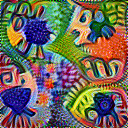

In [9]:
_ = render.render_vis(model, "mixed4a_pre_relu:476", param_f=lambda:arbitrary_channels_to_rgb(128, channels=10))

### Grayscale parametrization

`param.grayscale_image` creates param.image with a single channel and then tiles them 3 times for visualizing with modelzoo models.

512 771.40924


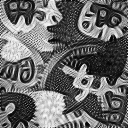

In [5]:
_ = render.render_vis(model, "mixed4a_pre_relu:476", param_f=lambda:grayscale_image_to_rgb(128))

### Testing different objectives

Different objectives applied to both parametrizations.

512 176003.55


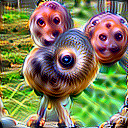

512 997.41125


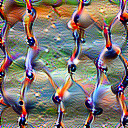

512 [1250.0197]


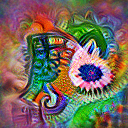

In [6]:
_ = render.render_vis(model, objectives.deepdream("mixed4a_pre_relu"), param_f=lambda:arbitrary_channels_to_rgb(128, channels=10))
_ = render.render_vis(model, objectives.channel("mixed4a_pre_relu", 360), param_f=lambda:arbitrary_channels_to_rgb(128, channels=10))
_ = render.render_vis(model, objectives.neuron("mixed4a_pre_relu", 476), param_f=lambda:arbitrary_channels_to_rgb(128, channels=10))

512 142696.16


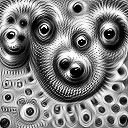

512 912.55396


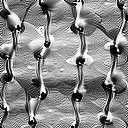

512 [1286.3795]


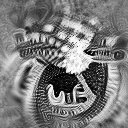

In [8]:
_ = render.render_vis(model, objectives.deepdream("mixed4a_pre_relu"), param_f=lambda:grayscale_image_to_rgb(128))
_ = render.render_vis(model, objectives.channel("mixed4a_pre_relu", 360), param_f=lambda:grayscale_image_to_rgb(128))
_ = render.render_vis(model, objectives.neuron("mixed4a_pre_relu", 476), param_f=lambda:grayscale_image_to_rgb(128))